<h1><center> EL7006 - Tarea Nº4 <br />Generative Models:  Variational Autoencoders <br/> </center></h1>
<h3><center>Profesor: Pablo Estévez <br />
Profesor Auxiliar: Jhon Intriago <br />
Ayudantes: Bastián Gamboa, Daniel Neira, Giovanni Castiglioni <br />
<h3><center>Semestre: Primavera 2022 </center></h3>

<h1><center><u>Parte Teórica</u></center></h1>



Como se vió en la clase de VAEs, la función de costo a optimizar está dada por:

$$
\mathcal{L}_{\text{negative-ELBO}}   = \mathbb{E}_{q(x)}[- \mathbb{E}_{q(z|x)}[\log p(x|z)] + D_{KL}(q(z|x)|| p(z)) ] 
$$

Donde $D_{KL}(q(z|x)|| p(z)) = \mathbb{E}_{q(z|x)}[\log q(z|x) - \log p(z)] $. En general las entropías y entropías cruzadas en el término $\mathcal{L}_{\text{negative-ELBO}}$ se obtienen de forma cerrada. Nos centraremos en el término regularizador $D_{KL}(q(z|x)|| p(z))$. 

Para obtener una función de pérdida cerrada en $D_{KL}(q(z|x)|| p(z))$ se realizan ciertas suposiciones. Las más relevantes son:

* La suposición mean field del encoder $q(z|x) = \prod_{j=1}^J q(z_j|x)$. Es decir no existe una correlación entre las variables latentes inferidas. $J$ el número de dimensiones.
* Se asume que $q(z_j|x)$ distribuye normal.
* Se asume una distribución prior $p(z) = \mathcal{N}(0, I)$.

Se obtendrá la función de costo de VAEs partiendo de un caso un poco más general, considerando $q(z|x) = \mathcal{N}(\mu_1, \Sigma_1)$ y $p(z) = \mathcal{N}(\mu_2, \Sigma_2)$ y posteriormente aplicando las suposiciones mencionadas se llegará a la fórmula típica usada en VAEs. Tomar $q(z|x)$ o $p(z)$ como distribuciones un poco más generales le dan mayor flexibilidad al modelo.

Para esto, considere los siguientes pasos: 

* Calcule $\int q(z|x) \log p(z)$. Como está trabajando con matrices le puede servir http://www2.imm.dtu.dk/pubdb/pubs/3274-full.html. Notar que debe obtener una solución matricial para esta entropía cruzada negativa.

<font size=1 color=red> <b>Para calcular la integral primero, vamos a escribir las distribuciones de probabilidad en detalle:

$$
q(\mathbf{z} \mid \mathbf{x}) = \frac{1}{(2\pi)^{k/2} \sqrt{\det(\Sigma_1)}} \exp \left( -\frac{1}{2} (\mathbf{z} - \boldsymbol{\mu}_1)^\top \Sigma_1^{-1} (\mathbf{z} - \boldsymbol{\mu}_1) \right)
$$

$$
p(\mathbf{z}) = \frac{1}{(2\pi)^{k/2} \sqrt{\det(\Sigma_2)}} \exp \left( -\frac{1}{2} (\mathbf{z} - \boldsymbol{\mu}_2)^\top \Sigma_2^{-1} (\mathbf{z} - \boldsymbol{\mu}_2) \right)
$$

Donde:

- $\mathbf{x} \in \mathbb{R}^k$ es un vector de características.
- $\mathbf{z} \in \mathbb{R}^k$ es un vector en el espacio de características.
- $\boldsymbol{\mu}_1$ y $\boldsymbol{\mu}_2$ son vectores de medias.
- $\Sigma_1$ y $\Sigma_2$ son matrices de covarianza.
- $k$ es la dimensión del espacio de características.


Sustituimos las expresiones de $q(\mathbf{z} \mid \mathbf{x})$ y $p(\mathbf{z})$ en la integral y simplificamos:

$$
\int_{\mathbb{R}^k} \left[ \frac{1}{(2\pi)^{k/2} \sqrt{\det(\Sigma_1)}} \exp \left( -\frac{1}{2} (\mathbf{z} - \boldsymbol{\mu}_1)^\top \Sigma_1^{-1} (\mathbf{z} - \boldsymbol{\mu}_1) \right) \right] \log \left[ \frac{1}{(2\pi)^{k/2} \sqrt{\det(\Sigma_2)}} \exp \left( -\frac{1}{2} (\mathbf{z} - \boldsymbol{\mu}_2)^\top \Sigma_2^{-1} (\mathbf{z} - \boldsymbol{\mu}_2) \right) \right] \, \mathrm{d}\mathbf{z}
$$

Por propiedad de logaritmo la expresión se descompone en una suma:
$$
\int_{\mathbb{R}^k} \left[ \frac{1}{(2\pi)^{k/2} \sqrt{\det(\Sigma_1)}} \exp \left( -\frac{1}{2} (\mathbf{z} - \boldsymbol{\mu}_1)^\top \Sigma_1^{-1} (\mathbf{z} - \boldsymbol{\mu}_1) \right) \right] \left[\log \left[ \frac{1}{(2\pi)^{k/2} \sqrt{\det(\Sigma_2)}}  \right]+\log \left[\exp \left( -\frac{1}{2} (\mathbf{z} - \boldsymbol{\mu}_2)^\top \Sigma_2^{-1} (\mathbf{z} - \boldsymbol{\mu}_2) \right) \right] \right]\, \mathrm{d}\mathbf{z}
$$

Por propiedad de la integral esta se decompone en las dos sumas quedando de la siguiente forma:
$$
\int_{\mathbb{R}^k} \left[ \frac{1}{(2\pi)^{k/2} \sqrt{\det(\Sigma_1)}} \exp \left( -\frac{1}{2} (\mathbf{z} - \boldsymbol{\mu}_1)^\top \Sigma_1^{-1} (\mathbf{z} - \boldsymbol{\mu}_1) \right) \right] \left[\log \left( \frac{1}{(2\pi)^{k/2} \sqrt{\det(\Sigma_2)}} \right)\right] \, \mathrm{d}\mathbf{z} \\
+ \int_{\mathbb{R}^k} \left[ \frac{1}{(2\pi)^{k/2} \sqrt{\det(\Sigma_1)}} \exp \left( -\frac{1}{2} (\mathbf{z} - \boldsymbol{\mu}_1)^\top \Sigma_1^{-1} (\mathbf{z} - \boldsymbol{\mu}_1) \right) \right] \left[\log \left( \exp \left( -\frac{1}{2} (\mathbf{z} - \boldsymbol{\mu}_2)^\top \Sigma_2^{-1} (\mathbf{z} - \boldsymbol{\mu}_2) \right) \right) \right]\, \mathrm{d}\mathbf{z}
$$
La primera integral es la de una normal multiplicada por una constante, por lo que integra la constante en el dominio sobre el cual se integra. se utiliza propiedad de logaritmo de la exponencial asumiendo que es natural, en caso de ser otra la base, solo se multiplica por un término $\log(\exp)$

$$
\log \left( \frac{1}{(2\pi)^{k/2} \sqrt{\det(\Sigma_2)}} \right)\\
+ \int_{\mathbb{R}^k} \left[ \frac{1}{(2\pi)^{k/2} \sqrt{\det(\Sigma_1)}} \exp \left( -\frac{1}{2} (\mathbf{z} - \boldsymbol{\mu}_1)^\top \Sigma_1^{-1} (\mathbf{z} - \boldsymbol{\mu}_1) \right) \right] \left[ -\frac{1}{2} (\mathbf{z} - \boldsymbol{\mu}_2)^\top \Sigma_2^{-1} (\mathbf{z} - \boldsymbol{\mu}_2)   \right]\, \mathrm{d}\mathbf{z}
$$

Se utiliza el siguiente termino conveniente:
$$
(\mathbf{z} - \boldsymbol{\mu}_1 + \boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)^\top \Sigma_2^{-1} (\mathbf{z} - \boldsymbol{\mu}_1 + \boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)   
$$

El cual al ser desarrollado resulta en:
$$
(\mathbf{z} - \boldsymbol{\mu}_1)^\top \Sigma_2^{-1}(\mathbf{z} - \boldsymbol{\mu}_1) + (\mathbf{z} - \boldsymbol{\mu}_1)^\top \Sigma_2^{-1}(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)+(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)^\top\Sigma_2^{-1}(\mathbf{z} - \boldsymbol{\mu}_1)+(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)^\top\Sigma_2^{-1}(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)\\
=(\mathbf{z} - \boldsymbol{\mu}_1)^\top \Sigma_2^{-1}(\mathbf{z} - \boldsymbol{\mu}_1) + 2(\mathbf{z} - \boldsymbol{\mu}_1)^\top \Sigma_2^{-1}(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)+(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)^\top\Sigma_2^{-1}(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)
$$

Al ser el último valor un real la expresión queda de la siguiente forma:
$$
-\log \left( (2\pi)^{k/2} \sqrt{\det(\Sigma_2)} \right)\\
+\int_{\mathbb{R}^k} \left[ \frac{1}{(2\pi)^{k/2} \sqrt{\det(\Sigma_1)}} \exp \left( -\frac{1}{2} (\mathbf{z} - \boldsymbol{\mu}_1)^\top \Sigma_1^{-1} (\mathbf{z} - \boldsymbol{\mu}_1) \right) \right] \left[ -\frac{1}{2} (\mathbf{z} - \boldsymbol{\mu}_1)^\top \Sigma_2^{-1}(\mathbf{z} - \boldsymbol{\mu}_1) - (\mathbf{z} - \boldsymbol{\mu}_1)^\top \Sigma_2^{-1}(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)   \right]\, \mathrm{d}\mathbf{z}\\
-(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)^\top\Sigma_2^{-1}(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)
$$

Además el termino $(\mathbf{z} - \boldsymbol{\mu}_1)$ al multiplicar a la normal entrega por un lado la esperanza y por el otro la media como constante, lo cual al restar queda cero ya que son el mismo valor, quedando la expresión anterior de la siguiente forma:
$$
-\log \left( (2\pi)^{k/2} \sqrt{\det(\Sigma_2)} \right)\\
+\int_{\mathbb{R}^k} \left[ \frac{1}{(2\pi)^{k/2} \sqrt{\det(\Sigma_1)}}\left( -\frac{1}{2} (\mathbf{z} - \boldsymbol{\mu}_1)^\top \Sigma_2^{-1}(\mathbf{z} - \boldsymbol{\mu}_1)  \right) \exp \left( -\frac{1}{2} (\mathbf{z} - \boldsymbol{\mu}_1)^\top \Sigma_1^{-1} (\mathbf{z} - \boldsymbol{\mu}_1) \right) \right] \, \mathrm{d}\mathbf{z}\\
-(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)^\top\Sigma_2^{-1}(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)
$$
El termino en la integral se deja expresado debido a su dificultad de manipulación, en el caso de una dimensión con cambio de variable se logra obtener una integral de la siguiente forma:  $ \int \frac{1}{\sqrt{2\pi}} \exp(-\frac{x^2}{2}) (-\frac{x^2}{2}) \, dx $ lo cual se resuelve al realizar integración por partes. 
</b></font>     



* Con el resultado anterior, que debiera estar en términos matriciales, asuma la suposición mean field tanto en $q(z|x)$ como $p(z)$ y llegue a 
$
\frac{1}{2}\sum_{j=1}^J \left( - \log(2\pi\sigma_{2j}^2) - \frac{\sigma^2_{1j}}{\sigma^2_{2j}} - \frac{(\mu_{1j} - \mu_{2j})^2}{\sigma_{2j}^2} \right)
$. Donde para $\mu$ y $\sigma^2$ el primer índice se refiere a la distribución y el segundo a las dimensiones. La demostración para el caso multivariado utilizando mean field se puede encontrar en https://arxiv.org/abs/1611.05148. No se utiliza esta demostración, se incluye por completitud.

<font size=1 color=red> <b>
Al realizar la suposición de mean field se pueden separar los terminos del logaritmo en una sumatoria (debido a que se tiene una pitatoria dentro del logaritmo). Además cada operación se efectua en una sola dimensión, por lo que la integral es manipulable de forma más directa, la expresión anterior con el supuesto de mean field se muestra a continuación (además se realiza una multiplicación por 1 conveniente para resolver la integral):

$$
\sum_{j=1}^J \left[-\log(\sqrt{2\pi\sigma_{2j}^2})\\
+\int\frac{1}{\sqrt{2\pi\sigma_{1j}^2}}(-\frac{(z-\mu_{1j})^2}{2\sigma_{2j}^2}\cdot\frac{\sigma_{1j}^2}{\sigma_{1j}^2})\exp(-\frac{(z-\mu_{1j})^2}{2\sigma_{1j}^2}) \, \mathrm{d}\mathbf{z}\\
-\frac{(\mu_{1j} - \mu_{2j})^2}{2\sigma_{2j}^2} \right]
$$

Para resolver la integral se realiza el cambio de variable $x=\frac{(z-\mu_{1j})}{\sigma_{2j}}$ y luego se realiza integración por partes. El proceso es análogo a lo mostrado en Appendix B del paper mencionado anteriormente, con esto la expresión queda como 

$$
\sum_{j=1}^J \left[-\log(\sqrt{2\pi\sigma_{2j}^2})
- \frac{\sigma^2_{1j}}{2\sigma^2_{2j}}
-\frac{(\mu_{1j} - \mu_{2j})^2}{2\sigma_{2j}^2} \right]
$$

Reordenando terminos y factorizando $1/2$ se obtiene la expresión pedida:
$$
\frac{1}{2}\sum_{j=1}^J \left[ - \log(2\pi\sigma_{2j}^2) - \frac{\sigma^2_{1j}}{\sigma^2_{2j}} - \frac{(\mu_{1j} - \mu_{2j})^2}{\sigma_{2j}^2} \right]
$$ 
</b></font> 

* Utilizando la expresión anterior, tomando prior $p(z) = \mathcal{N}(0,I)$ y utilizando la expresión $D_{KL}(q(z|x)|| p(z)) = \mathbb{E}_{q(z|x)}[\log q(z|x) - \log p(z)] $ , llegue a la fórmula cerrada de esta divergencia utilizada en variational autoencoders dada por $\frac{1}{2}\sum_{j = 1}^J \left( \mu(X) + \sigma^2(x) - \log \sigma^2(x) - 1  \right)$.

<font size=1 color=red> <b>Por propiedad de la esperanza se separa la resta en dos esperanzas y se utiliza la expresión anterior considerando el nuevo prior, de esta forma se obtienen las dos esperanzas remplazando valores se obtienen como:

$$
\mathbb{E}_{q(z|x)}[\log q(z|x)]=\frac{1}{2}\sum_{j=1}^J \left[ - \log(2\pi\sigma^2) - 1 - 0 \right]
$$

$$
\mathbb{E}_{q(z|x)}[\log p(z)]=\frac{1}{2}\sum_{j=1}^J \left[ - \log(2\pi) - \frac{\sigma^2_{1j}}{1} - \frac{(\mu_{1j} - 0)^2}{1^2} \right]
$$

Al realizar la resta para obtener $D_{KL}(q(z|x)|| p(z))$ se obtiene:

$$
D_{KL}(q(z|x)|| p(z))= \frac{1}{2}\sum_{j=1}^J \left[ - \log(2\pi\sigma^2) - 1 - 0 -(- \log(2\pi) - \frac{\sigma^2_{1j}}{1} - \frac{(\mu_{1j} - 0)^2}{1^2})\right]
$$
al simplificar la expresión se obtiene la fórmula cerrada de esta divergencia utilizada en variational autoencoders:

$$
D_{KL}(q(z|x)|| p(z))= \frac{1}{2}\sum_{j=1}^J \left[ - \log(\sigma^2) - 1 + \sigma^2 + \mu^2 \right]
$$
</b></font> 


    



<h1><center><u>Parte Práctica </u></center></h1>

En este parte, usted debe implementar y entrenar un modelo de VAEs. Además deberá comparar el desempeño de estos modelos según la métrica de evaluación solicitada. 


<h2>Preliminares: Google Colab</h2>

Para evitar limitaciones de hardware, ejecute este notebook en Google Colab con GPU. Para ello siga estos pasos:

- Suba este notebook a su cuenta de Google Drive.
- Abra el notebook. Se hará automáticamente en Google Colab.
- En el menú "Entorno de ejecución", seleccione "Cambiar tipo de entorno de ejecución" y en "Acelerador por hardware" seleccione GPU.

<h2>Preliminares: PyTorch</h2>

Por simplicidad, en esta tarea se utilizará PyTorch. Se entrega una estructura general del código a implementar, con el objetivo de no requerir conocimientos profundos del framework utilizado.

<h2> Funcionamiento VAE  </h2>

A continuación se recuerda cómo funciona un Variational Autoencoder.

1. Se samplea de la distribución empírica $q(x)$. (Esto sería el data loader)

2. A través del encoder se obtienen los $\mu$ y los $\log \sigma^2$. En general se parametriza $\log \sigma^2$ en vez de $\sigma$, pues la salida generalmente se toma como lineal y basta tomar la exponencial de $\log \sigma^2$ para obtener $\sigma^2$ y así asegurar que este sea positivo.

3. Se samplea ruido proveniente de una distribución normal $\epsilon \sim \mathcal{N}(0, I)$
4. Se utiliza el truco de [reparametrización](https://arxiv.org/abs/1312.6114) para samplear de $q(z|x)$ y además optimizar sus parametros (los parámetros del encoder). Esto es, el $\tilde{z}$ sampleado de $q(z|x)$ se puede escribir como $\tilde{z} = \mu(x) + \sigma(x) \odot \epsilon $. Este paso en general se utiliza para optimizar el encoder mediante la función de pérdida asociada a la verosimilitud. La divergencia no toma en cuenta cuantos sampleos se hagan ya que se calcula de forma cerrada. En caso que no se calculase en forma cerrada, importaría el número de sampleos de $q(z|x)$. Para la tarea sólo debe samplear un $z(\tilde{x}_i)$ por cada $x_i \sim q(x) $. Esto es lo que se conoce como los sampleos de Monte-Carlo.
5. Se calcula la verosomilitud negativa y se minimiza. Se calcula la divergencia de la parte teórica y se minimiza.


<h2> Deep Convolutional VAE  </h2>

En esta sección, usted deberá implementar una arquitectura muy similar a la pregunta de GANs en la que se utiliza la [DCGAN](https://arxiv.org/pdf/1511.06434v1.pdf). Se utilizará el mismo generador. El encoder utilizado será casi completamente similar al discriminador de la DCGAN.

Alguna de las características de la DCGAN son: 
*   Usa convoluciones sin capas de pooling
*   Usa BatchNormalization tanto en el Generador como en el Discriminador (En este caso no se tiene un Discriminador pero se utilizará un Encoder con las mismas características).
*   No usa capas <i> Fully Connected </i>
*   Usa activaciones ReLU en el Generador, salvo en la última capa donde usa Tanh. En este caso en vez de Tanh debe tener una salida lineal.
*   Usa activaciones LeakyReLU en el Discriminador (en este caso Encoder), salvo en la última capa donde no usa activación

A continuación se importan los paquetes a utilizar.

In [1]:
from IPython import display
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0); # Set for testing purposes, please do not change!

c:\Users\nfier\anaconda3\envs\openmmlab\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# If you have multiple devices and just want to use one, 
# then uncomment the following two lines:
# i_device = 1
# device = 'cuda:{0}'.format(i_device)
# Otherwise, uncomment the following line:
device = 'cuda'

<h3> Bloque del Generador </h3>

Para comenzar, deberá implementar los bloques que componen el Generador.
Debido a que la función de activación varía según la capa, se deberá considerar esto al momento de la creación del bloque.

La estructura de cada bloque deberá ser la siguiente: 
*   Una capa deconvolucional, utilizando los parámetros dados
*   Una capa de batchnorm, salvo en la última capa
*   Una activación ReLU después de cada batchnorm
*   Una activacion lineal, sólo para la última capa

In [3]:
def make_gen_block(input_channels, output_channels, kernel_size=3, stride=2, final_layer=False):
    if not final_layer:
        return nn.Sequential(
        ### YOUR CODE HERE ###
        torch.nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
        torch.nn.BatchNorm2d(output_channels),
        torch.nn.ReLU()
        )
    else:
        return nn.Sequential(
        ### YOUR CODE HERE ###
        torch.nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
        torch.nn.Identity()
        )

In [4]:
def get_noise(n_samples, z_dim, device='cpu'):
    return torch.randn(n_samples, z_dim, device=device)

<h2> Generador</h2>

Ahora construya un Generador formado por 4 bloques, con las siguientes especificaciones:

    1.-block: z_dim          -> hidden_dim * 4 , kernel_size=3, stride=2
    2.-block: hidden_dim * 4 -> hidden_dim * 2 , kernel_size=4, stride=1
    3.-block: hidden_dim * 2 -> hidden_dim     , kernel_size=3, stride=2
    4.-block: hidden_dim     -> im_chan        , kernel_size=4, stride=2


In [5]:
class Generator(nn.Module):
    def __init__(self, z_dim=10, im_chan=1, hidden_dim=64):
        super(Generator, self).__init__()
        self.z_dim = z_dim

        self.gen = nn.Sequential(
        ### YOUR CODE HERE ###
        make_gen_block(z_dim, hidden_dim*4, kernel_size=3, stride=2),
        make_gen_block(hidden_dim*4, hidden_dim*2, kernel_size=4, stride=1),
        make_gen_block(hidden_dim*2, hidden_dim, kernel_size=3, stride=2),
        make_gen_block(hidden_dim, im_chan, kernel_size=4, stride=2, final_layer=True)
        )

    def unsqueeze_noise(self, noise):
        return noise.view(len(noise), self.z_dim, 1, 1)

    def forward(self, noise):
        x = self.unsqueeze_noise(noise)
        return self.gen(x)

<h3> Bloque del Encoder</h3>

Procederemos a implementar un bloque para el Encoder.
La estructura de cada bloque deberá ser la siguiente: 

*    Una capa convolucional, utilizando los parámetros dados
*    Una capa de batchnorm, excepto por la última capa
*    Una activacion LeakyReLU de pendiente 0.2, sólo después de las capas de batchnorm

In [6]:
def make_enc_block(input_channels, output_channels, kernel_size=4, stride=2, final_layer=False):     
        if not final_layer:
            return nn.Sequential(
            ### YOUR CODE HERE ###
            torch.nn.Conv2d(input_channels, output_channels, kernel_size, stride),
            torch.nn.BatchNorm2d(output_channels),torch.nn.LeakyReLU(0.2)
            )
        else:
            return nn.Sequential(
            ### YOUR CODE HERE ###
            torch.nn.Conv2d(input_channels, output_channels, kernel_size, stride)
            )

<h2> Encoder </h2>

Ahora construya un Encoder formado por 3 bloques, con las siguientes especificaciones:

    1.-block: im_chan        -> hidden_dim     , kernel_size=4, stride=2
    2.-block: hidden_dim     -> hidden_dim * 2 , kernel_size=4, stride=2
    3.-block: hidden_dim * 2 -> 2*z_dim        , kernel_size=4, stride=2
    
Además tiene que definir la función split_output, que separa la predicción del encoder en los $\mu$ y $\log \sigma^2$.

In [7]:
class Encoder(nn.Module):
    def __init__(self, z_dim = 2, im_chan=1, hidden_dim=16):
        super(Encoder, self).__init__()
        self.z_dim = z_dim
        self.enc = nn.Sequential(
        ### YOUR CODE HERE ###
        make_enc_block(im_chan, hidden_dim, kernel_size=4, stride=2),
        make_enc_block(hidden_dim, hidden_dim*2, kernel_size=4, stride=2),
        make_enc_block(hidden_dim*2, 2*z_dim, kernel_size=4, stride=2)
        )
        
    def split_output(self, features):
        ### YOUR CODE HERE ###
        return features[:, :self.z_dim], features[:, self.z_dim:]
        
    def forward(self, image):
        enc_pred = self.enc(image)
        return self.split_output(enc_pred)

A continuación se definen los parámetros de entrenamiento a utlizar, y una función de utilidad para la inicialización de los pesos.

In [8]:
# Setting the training parameters
z_dim = 2
display_step = 500
batch_size = 128
lr = 0.0002
beta_1 = 0.5 
beta_2 = 0.999

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

dataloader = DataLoader(
    MNIST('.', download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True)

In [9]:
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta_1, beta_2))
enc = Encoder().to(device) 
enc_opt = torch.optim.Adam(enc.parameters(), lr=lr, betas=(beta_1, beta_2))

def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)
gen = gen.apply(weights_init)
enc = enc.apply(weights_init)

<h3> Funciones de Loss</h3>

Implemente los métodos `get_neg_likelihood_loss` y `get_divergence_loss`. La función `get_neg_likelihood_loss` calcula la verosimilitud negativa en el espacio observable. Esta la debe calcular como un MSE entre la reconstrucción y el dato original como se vio en clases. La función `get_divergence_loss` es la divergencia vista en la parte teórica.

In [10]:
def get_neg_likelihood_loss(x, x_rec):
    ### YOUR CODE HERE ###
    mse_loss = torch.nn.functional.mse_loss(x_rec, x)
    neg_lik_loss = mse_loss
    return neg_lik_loss

def get_divergence_loss(mu, logvar):
    ### YOUR CODE HERE ###
    # Divergencia de Kullback-Leibler entre la distribución latente y la distribución estándar normal
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    divergence_loss = kl_divergence
    return divergence_loss

<h2> Entrenamiento VAE </h2>

Muchas veces en la práctica se usa algo conocido como [$\beta$-VAE](https://openreview.net/forum?id=Sy2fzU9gl) cuya función de costo es muy similar a la función de VAE. La única diferencia es un ponderador en la divergencia como se muestra a continuación:
$$
\mathcal{L}_{\text{negative-ELBO}-\beta-\text{VAE}}   = \mathbb{E}_{q(x)}[- \mathbb{E}_{q(z|x)}[\log p(x|z)] + \beta \cdot D_{KL}(q(z|x)|| p(z)) ] 
$$

A continuación defina una función de entrenamiento de VAE dejando $\beta$ como parámetro libre. En su entrenamiento comente todos los puntos mencionados en  <b>Funcionamiento VAE</b>. Utilice todas las funciones creadas en las secciones anteriores. Puede guiarse por el loop de entrenamiento utilizado en la pregunta de GANs.


In [24]:
def train_VAE(beta,n_epochs=50):
    mean_generator_loss = 0
    mean_discriminator_loss = 0
    for epoch in range(n_epochs):
        for real, _ in tqdm(dataloader):
            cur_batch_size = len(real)
            real = real.to(device)

            # Update discriminator
            enc_opt.zero_grad()
            fake_noise = get_noise(cur_batch_size, z_dim, device=device)
            fake = gen(fake_noise)
            disc_fake_pred = enc(fake.detach())
            disc_real_pred = enc(real)
            enc_loss = get_neg_likelihood_loss(real, disc_real_pred[0]) + beta*get_divergence_loss(disc_real_pred[0], disc_real_pred[1])

            mean_discriminator_loss += enc_loss.item() / display_step
            # Update gradients
            enc_loss.backward(retain_graph=True)
            # Update optimizer
            enc_opt.step()

            # Update generator 
            gen_opt.zero_grad()
            fake_noise_2 = get_noise(cur_batch_size, z_dim, device=device)
            fake_2 = gen(fake_noise_2)
            disc_fake_pred = enc(fake_2)
            gen_loss = get_neg_likelihood_loss(fake_2, disc_fake_pred[0]) + beta*get_divergence_loss(disc_fake_pred[0], disc_fake_pred[1])
            gen_loss.backward()
            gen_opt.step()
            mean_generator_loss += gen_loss.item() / display_step
    torch.save(gen.state_dict(), f'gen_beta{beta}.pth')
    torch.save(enc.state_dict(), f'enc_beta{beta}.pth')
    return gen,enc

<h2> Plot 2-D </h2>

Utilizando la función anterior, varíe $\beta$ tal que la distribución marginal $q(z)$ sea aproximadamente una gaussiana. Para mostrar esto, genere tres plots 2D del espacio latente; uno con $\beta$ bajo, otro con un valor medio y otro con valor alto. ¿Qué ocurre para cada valor de $\beta$?

In [27]:
beta_values = [0.1, 1.0, 10.0]

for beta in beta_values:
    train_VAE(beta)

  0%|          | 0/469 [00:00<?, ?it/s]C:\Users\nfier\AppData\Local\Temp\ipykernel_12256\1499603680.py:3: UserWarning: Using a target size (torch.Size([128, 1, 28, 28])) that is different to the input size (torch.Size([128, 2, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse_loss = torch.nn.functional.mse_loss(x_rec, x)
 99%|█████████▉| 466/469 [00:11<00:00, 23.44it/s]C:\Users\nfier\AppData\Local\Temp\ipykernel_12256\1499603680.py:3: UserWarning: Using a target size (torch.Size([96, 1, 28, 28])) that is different to the input size (torch.Size([96, 2, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse_loss = torch.nn.functional.mse_loss(x_rec, x)
100%|██████████| 469/469 [00:21<00:00, 22.12it/s]


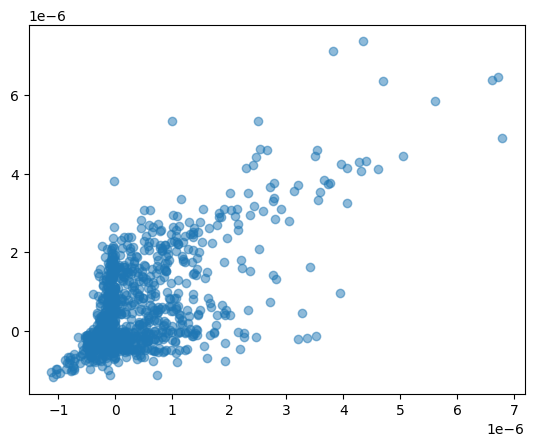

In [33]:
gen=Generator(z_dim).to(device)
beta=0.1
gen.load_state_dict(torch.load(f'gen_beta{beta}.pth'))
gen.eval()
z_samples = torch.randn(1000, z_dim).to(device)
gen(z_samples).shape
latent_representations = enc(gen(z_samples))
x=torch.squeeze(latent_representations[0][:, 0]).detach().cpu().numpy()
y=torch.squeeze(latent_representations[0][:, 1]).detach().cpu().numpy()
plt.scatter(x, y, alpha=0.5)

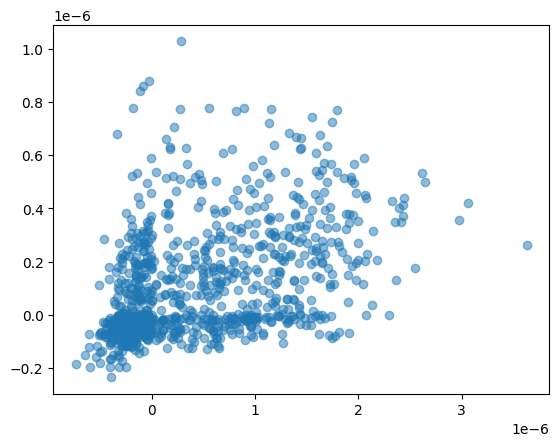

In [34]:
gen=Generator(z_dim).to(device)
beta=1.0
gen.load_state_dict(torch.load(f'gen_beta{beta}.pth'))
gen.eval()
z_samples = torch.randn(1000, z_dim).to(device)
gen(z_samples).shape
latent_representations = enc(gen(z_samples))
x=torch.squeeze(latent_representations[0][:, 0]).detach().cpu().numpy()
y=torch.squeeze(latent_representations[0][:, 1]).detach().cpu().numpy()
plt.scatter(x, y, alpha=0.5)

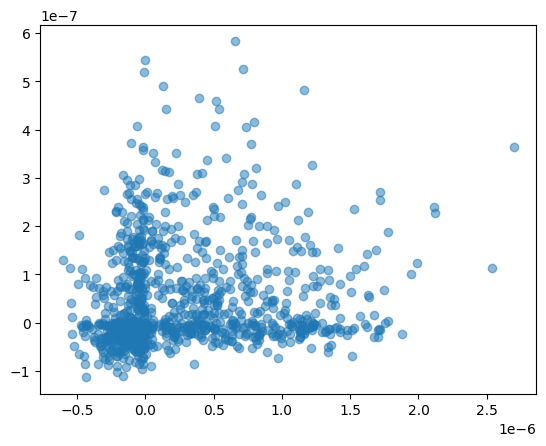

In [35]:
gen=Generator(z_dim).to(device)
beta=10.0
gen.load_state_dict(torch.load(f'gen_beta{beta}.pth'))
gen.eval()
z_samples = torch.randn(1000, z_dim).to(device)
gen(z_samples).shape
latent_representations = enc(gen(z_samples))
x=torch.squeeze(latent_representations[0][:, 0]).detach().cpu().numpy()
y=torch.squeeze(latent_representations[0][:, 1]).detach().cpu().numpy()
plt.scatter(x, y, alpha=0.5)

Con $\beta$ de mayor valor se observa que los datos se concentran menos en regiones específicas y hay más presencia de más outliers, en el caso de valor más bajo los datos se concentran más.